In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('/content/Iris.csv')
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
0


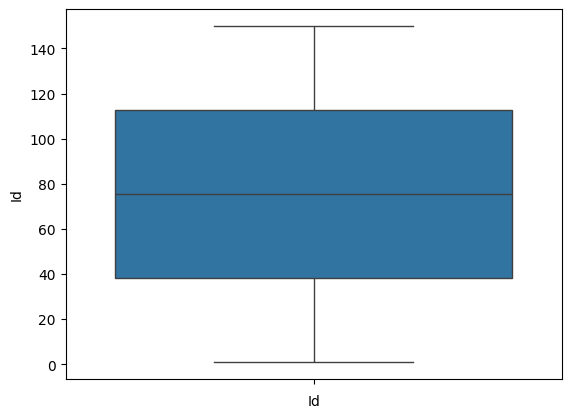

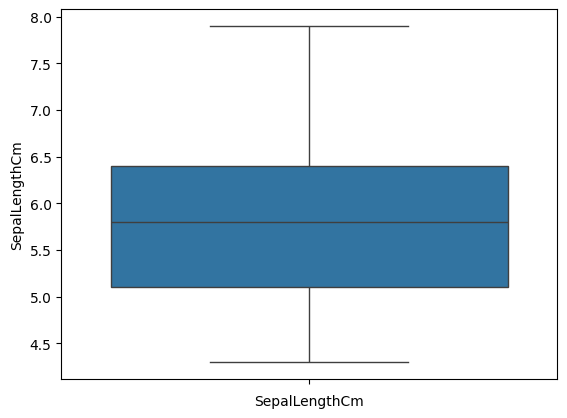

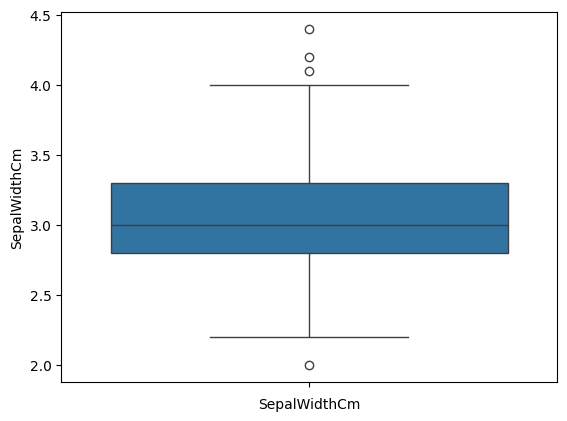

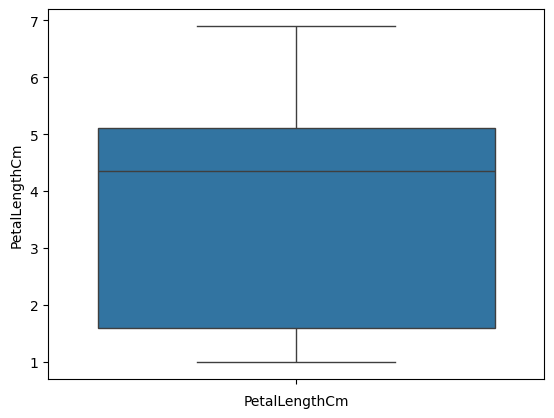

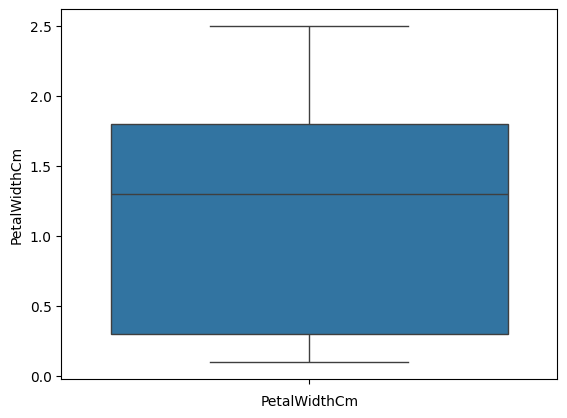

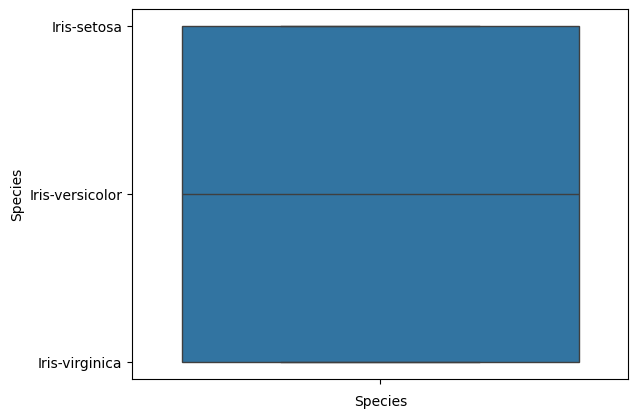

In [16]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])

In [18]:
X=df.drop('Species',axis=1)
y=df['Species']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

model_lr = LogisticRegression(max_iter=500)
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
print("Accuracy(Logistic Regression):", accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

model_svc = SVC(kernel='rbf')
model_svc.fit(x_train, y_train)
y_pred = model_svc.predict(x_test)
print("Accuracy(SVM):", accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy(Logistic Regression): 97.77777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.95      1.00      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy(SVM): 97.77777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.95      1.00      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Sample Data Testing

In [21]:
sample_data = [1,5.1, 3.5, 1.4, 0.2]
new_df = pd.DataFrame([sample_data], columns=x_train.columns)

model_lr = LogisticRegression(max_iter=500)
model_lr.fit(x_train, y_train)
log_pred = model_lr.predict(new_df)
print("Predicted Species (Logistic Regression):", le.inverse_transform(log_pred)[0])

model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred = model_svc.predict(new_df)
print("Predicted Species (SVM):", le.inverse_transform(y_pred)[0])

Predicted Species (Logistic Regression): Iris-setosa
Predicted Species (SVM): Iris-setosa
